In [4]:
import tqdm
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, cdist, squareform

plt.style.use("jupyter")

In [40]:
iza = pd.read_csv("../data/iza_nnpscan_dm.csv", index_col=0)
zfeat = pd.read_csv("../data/iza_nnpscan_features.csv", index_col=0)
hyp = pd.read_csv("../data/hyp_dm.csv", index_col=0)
hfeat = pd.read_csv("../data/hyp_features.csv", index_col=0)

In [68]:
# REMOVE_ZEOLITES = ["RWY"]
REMOVE_ZEOLITES = ["RWY", "JSR"]

In [69]:
zdensity = (zfeat
    .loc[~zfeat.iza_code.isin(REMOVE_ZEOLITES)]
    ["density"]
    .values
    .reshape(-1, 1)
)
hdensity = hfeat["density"].values.reshape(-1, 1)

In [70]:
ddist = cdist(hdensity, zdensity)

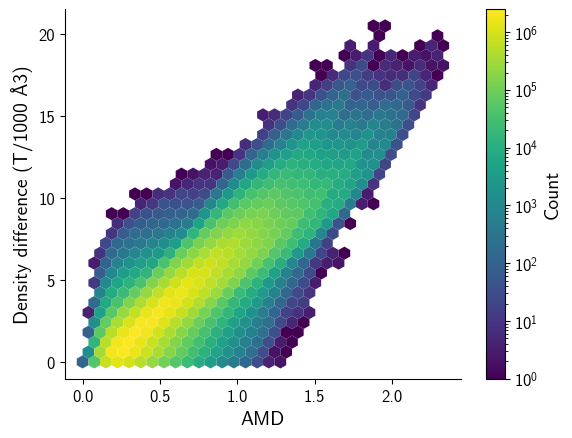

In [71]:
fig, ax = plt.subplots()

x = hyp.drop(REMOVE_ZEOLITES, axis=1).values.reshape(-1)
y = ddist.reshape(-1)

hb = ax.hexbin(
    x, 
    y,
    gridsize=31,
    linewidths=(0.,),
    mincnt=1,
    cmap="viridis",
    bins="log"
)

cbar = fig.colorbar(hb)
cbar.set_label("Count")

ax.set_xlabel("AMD")
ax.set_ylabel("Density difference (T/1000 Å3)")

# for _xy, label in zip(subX, iza.index):
#     ax.annotate(label, _xy)
    
plt.show()